<a href="https://colab.research.google.com/github/Jamil226/InstaPy/blob/master/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("input/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

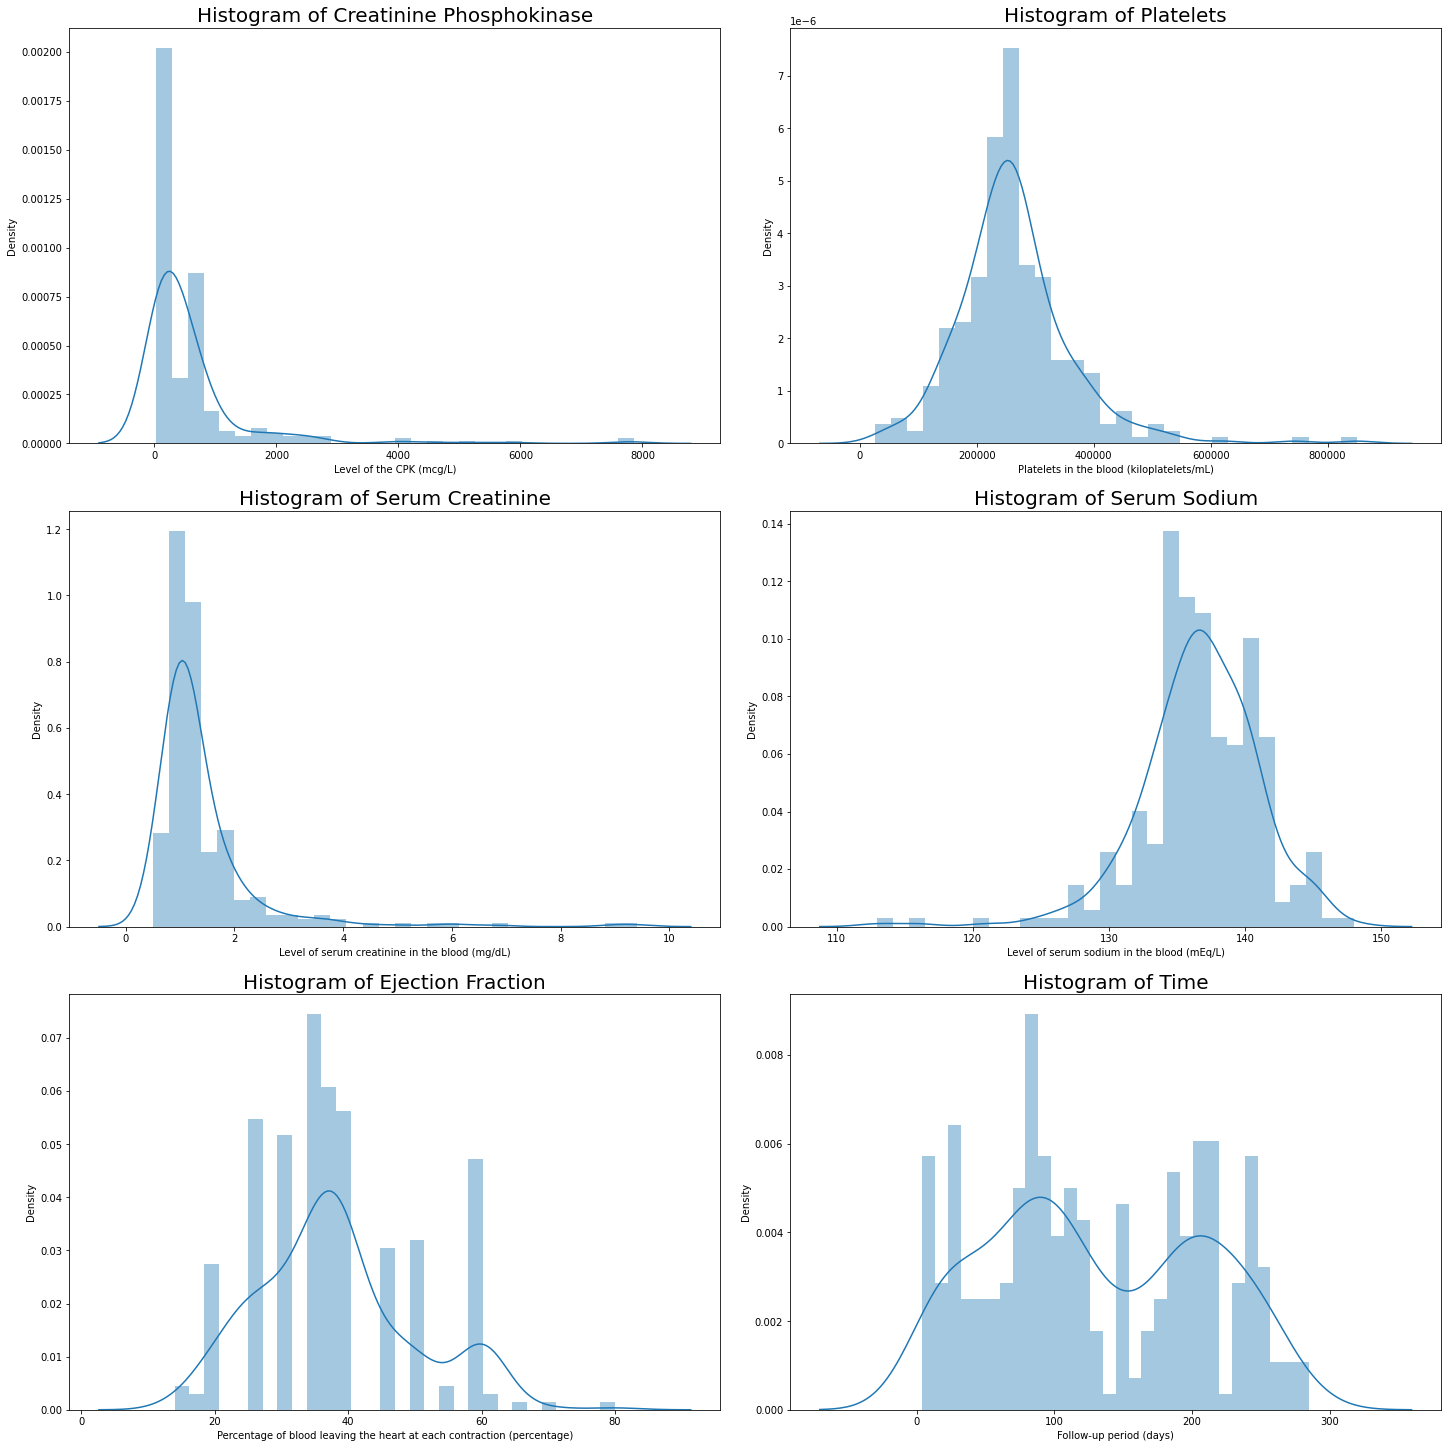

In [6]:
fig, axes = plt.subplots(3,2,figsize=(20,20),constrained_layout=True)
plot_hist(df.creatinine_phosphokinase,
          title='Creatinine Phosphokinase',
          xlabel="Level of the CPK (mcg/L)",
          ax=axes[0,0])
plot_hist(df.platelets,
          bins=30,
          title='Platelets',
          xlabel='Platelets in the blood (kiloplatelets/mL)',
          ax=axes[0,1])
plot_hist(df.serum_creatinine,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[1,0])
plot_hist(df.serum_sodium,
          bins=30,
          title='Serum Sodium',
          xlabel='Level of serum sodium in the blood (mEq/L)',
          ax=axes[1,1])
plot_hist(df.ejection_fraction,
          title='Ejection Fraction', 
          xlabel='Percentage of blood leaving the heart at each contraction (percentage)',
          ax=axes[2,0])
plot_hist(df.time,
          bins=30,
          title='Time',
          xlabel='Follow-up period (days)',
          ax=axes[2,1])
plt.show()

In [7]:
fig = px.histogram(df, x="age",color="DEATH_EVENT")
fig.show()

In [8]:
len_data = len(df)
len_w = len(df[df["sex"]==0])
len_m = len_data - len_w

men_died = len(df.loc[(df["DEATH_EVENT"]==1) &(df['sex']==0)])
men_survived = len_m - men_died

women_died = len(df.loc[(df["DEATH_EVENT"]==1) & (df['sex']==1)])
women_survived = len_w - women_died

labels = ['Men died','Men survived','Women died','Women survived']
values = [men_died, men_survived, women_died, women_survived]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of DEATH EVENT according to their gender")
fig.show()

In [9]:
fig = px.pie(df, values='sex', names='DEATH_EVENT',color_discrete_sequence=px.colors.sequential.RdBu
            ,title='Proportional of death event based on sex')
fig.show()

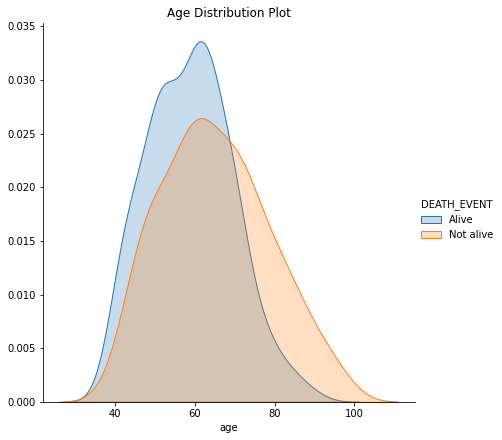

In [10]:
fg=sns.FacetGrid(df, hue="DEATH_EVENT", height=6,)
fg.map(sns.kdeplot, "age",shade=True).add_legend(labels=["Alive","Not alive"])
plt.title('Age Distribution Plot');
plt.show()

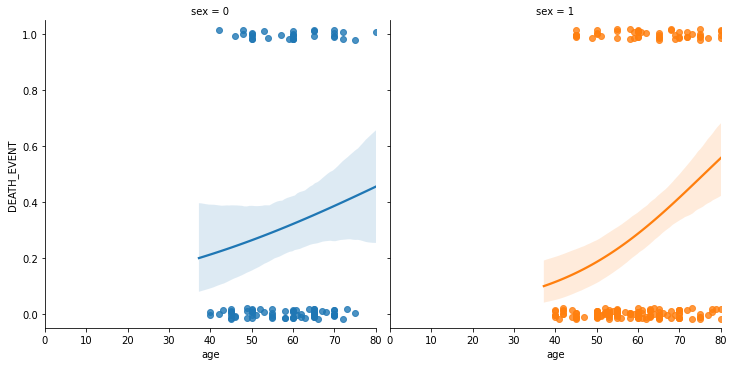

In [11]:
g = sns.lmplot(x="age", y="DEATH_EVENT", col="sex", hue="sex", data=df, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05));

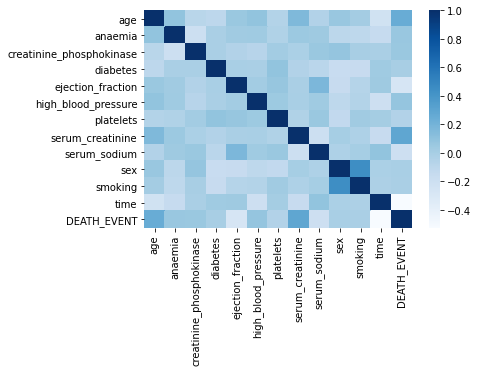

In [12]:
sns.heatmap(df.corr(),cmap="Blues");

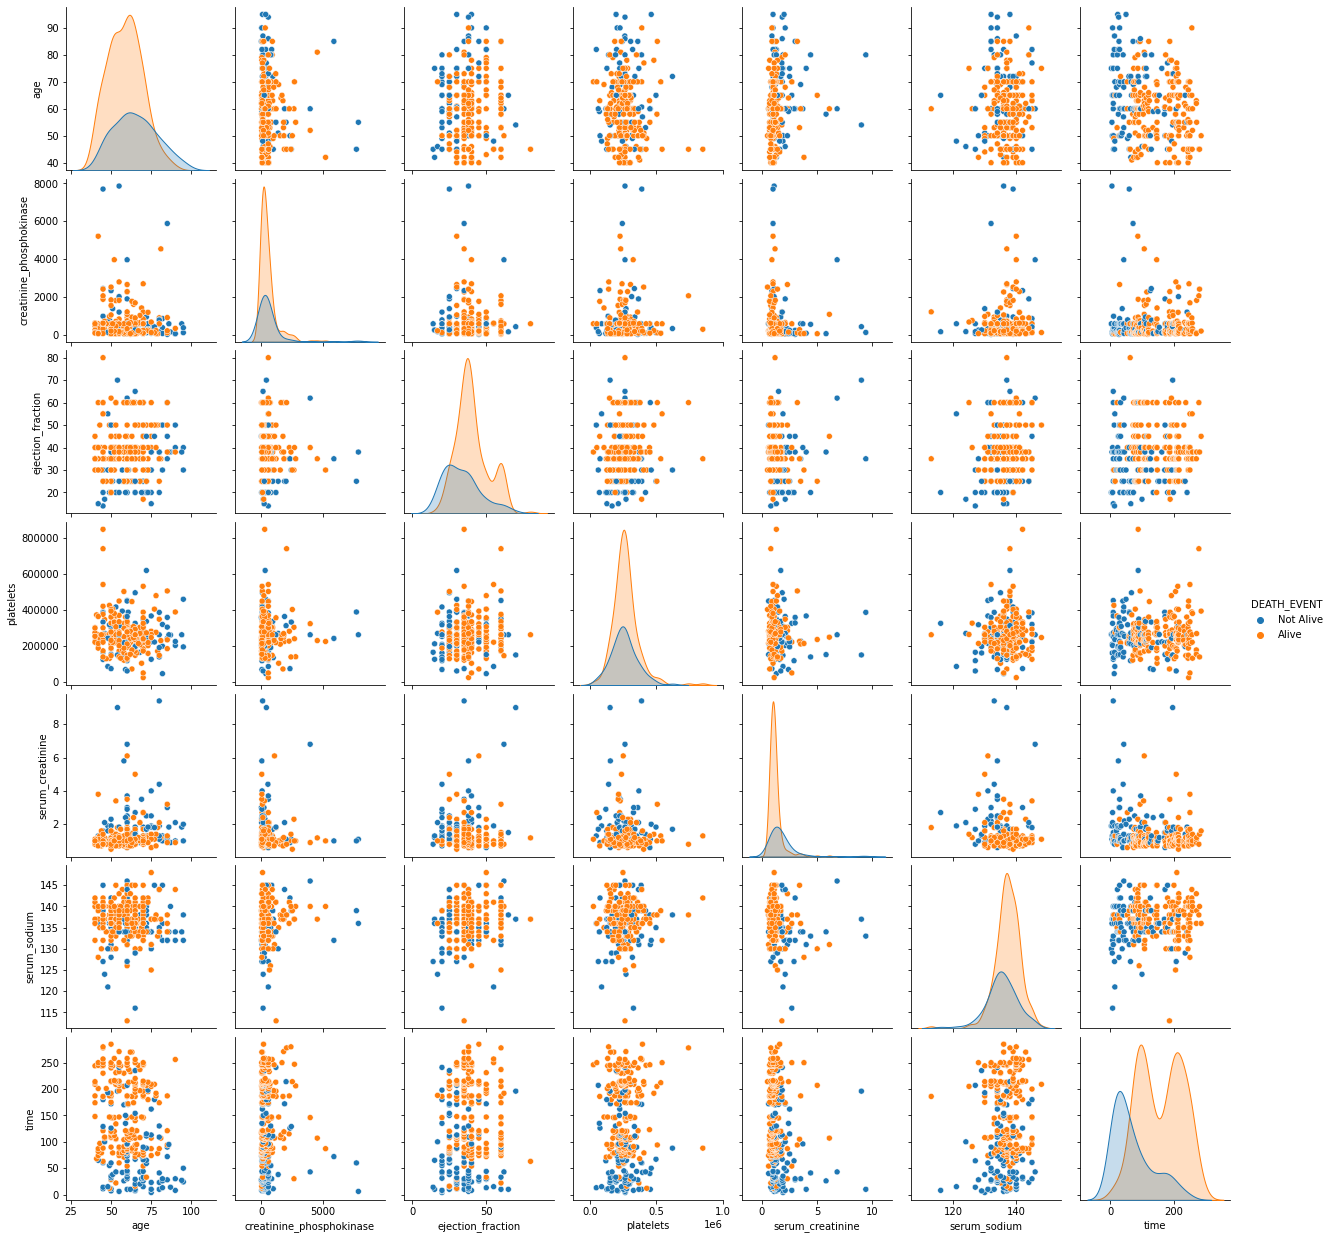

In [13]:
data = df.copy()
data.loc[data.DEATH_EVENT == 0, 'DEATH_EVENT'] = "Alive"
data.loc[data.DEATH_EVENT == 1, 'DEATH_EVENT'] = "Not Alive"
sns.pairplot(data=data[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']], hue='DEATH_EVENT');

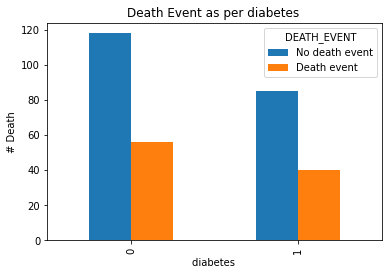

In [14]:
pd.crosstab(df.diabetes ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['No death event', 'Death event'])
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('# Death')
plt.show()

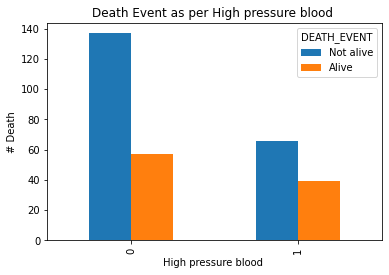

In [15]:
pd.crosstab(df.high_blood_pressure ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per High pressure blood ')
plt.xlabel('High pressure blood ')
plt.ylabel('# Death')
plt.show()

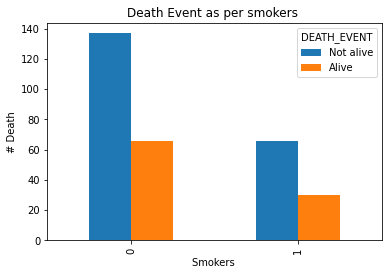

In [16]:
pd.crosstab(df.smoking ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per smokers ')
plt.xlabel('Smokers ')
plt.ylabel('# Death')
plt.show()

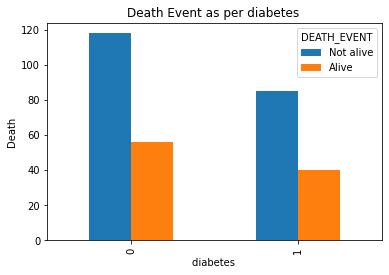

In [17]:
pd.crosstab(df.diabetes ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per diabetes ')
plt.xlabel('diabetes ')
plt.ylabel('Death')
plt.show()

In [18]:
len_data = len(df)
len_w = len(df[df["sex"]==0])
len_m = len_data - len_w

men_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['sex']==0)])
men_without_diabetes = len_m - men_with_diabetes

women_with_diabetes = len(df.loc[(df["diabetes"]==1) & (df['sex']==1)])
women_without_diabetes = len_w - women_with_diabetes
#print(men_with_diabetes,men_without_diabetes) 
#print(women_with_diabetes,women_without_diabetes)

labels = ['M_diabetes','M_no_diabete','W_diabete','W_no_diabete']
values = [men_with_diabetes, men_without_diabetes, women_with_diabetes, women_without_diabetes]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of No/diabetics according to their gender. (M for Men, W for Women)")
fig.show()

In [19]:
fig = px.parallel_categories(df[["sex","smoking","diabetes","anaemia","high_blood_pressure","time","DEATH_EVENT"]], color='DEATH_EVENT', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [20]:
fig = px.box(df, x="DEATH_EVENT", y="age", color="smoking", notched=True)
fig.show()

In [21]:
x = df.copy()
y = x.loc[:,["DEATH_EVENT"]]
x = x.drop(columns=['time','DEATH_EVENT'])
features_names = x.columns

In [22]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA


Feature ranking:
1. feature 4 (0.179926)
2. feature 7 (0.170559)
3. feature 0 (0.140676)
4. feature 8 (0.118325)
5. feature 2 (0.107790)
6. feature 6 (0.102406)
7. feature 3 (0.043835)
8. feature 10 (0.039155)
9. feature 1 (0.034604)
10. feature 9 (0.033613)
11. feature 5 (0.029111)


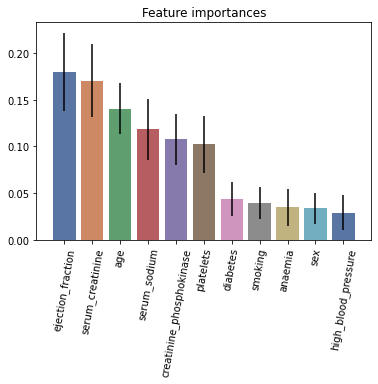

In [24]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
sns.barplot(x=features_names[indices].to_numpy(), y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(x.shape[1]), features_names[indices].to_numpy(),rotation=80)
plt.xlim([-1, x.shape[1]])
plt.show()

In [25]:
features = features_names[indices].to_numpy()[0:6]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="DEATH_EVENT"
)
fig.update_traces(diagonal_visible=False)

fig.update_layout(
    title='Correlation map on best first 5 features',
    dragmode='select',
    width=1200,
    height=1200,
    #hovermode='closest',
)
fig.show()

In [26]:
def plot_cm(cm,title):
    z = cm
    x = ['No death Event', 'Death Event']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.10,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.15,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=20),width=750,height=750)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [30]:
!pip3 install catboost

     |████████████████████████████████| 66.3MB 59kB/s 


In [31]:
from catboost import CatBoostClassifier
models= [['Logistic Regression ',LogisticRegression()],
        ['KNearest Neighbor ',KNeighborsClassifier()],
        ['Decision Tree Classifier ',DecisionTreeClassifier()],
        ['Random Forest Classifier ',RandomForestClassifier()],
        ['Ada Boost ',AdaBoostClassifier()],
        ['SVM ',SVC()],
        ['XG Boost',XGBClassifier()],
        ['Cat Boost',CatBoostClassifier(logging_level='Silent')]]

models_score = []
for name,model in models:
    
    model = model
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    cm_model = confusion_matrix(y_test, model_pred)
    models_score.append(accuracy_score(y_test,model.predict(x_test)))
    
    print(name)
    print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
    print('############################################')
    plot_cm(cm_model,title=name+"model")
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)

    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

Logistic Regression 
Validation Acuuracy:  0.7833333333333333
Training Accuracy:  0.7405857740585774
############################################


KNearest Neighbor 
Validation Acuuracy:  0.65
Training Accuracy:  0.7615062761506276
############################################


Decision Tree Classifier 
Validation Acuuracy:  0.7333333333333333
Training Accuracy:  1.0
############################################


Random Forest Classifier 
Validation Acuuracy:  0.7666666666666667
Training Accuracy:  1.0
############################################


Ada Boost 
Validation Acuuracy:  0.7166666666666667
Training Accuracy:  0.891213389121339
############################################


SVM 
Validation Acuuracy:  0.7
Training Accuracy:  0.6736401673640168
############################################


XG Boost
Validation Acuuracy:  0.7333333333333333
Training Accuracy:  0.9246861924686193
############################################


Cat Boost
Validation Acuuracy:  0.7833333333333333
Training Accuracy:  0.9748953974895398
############################################


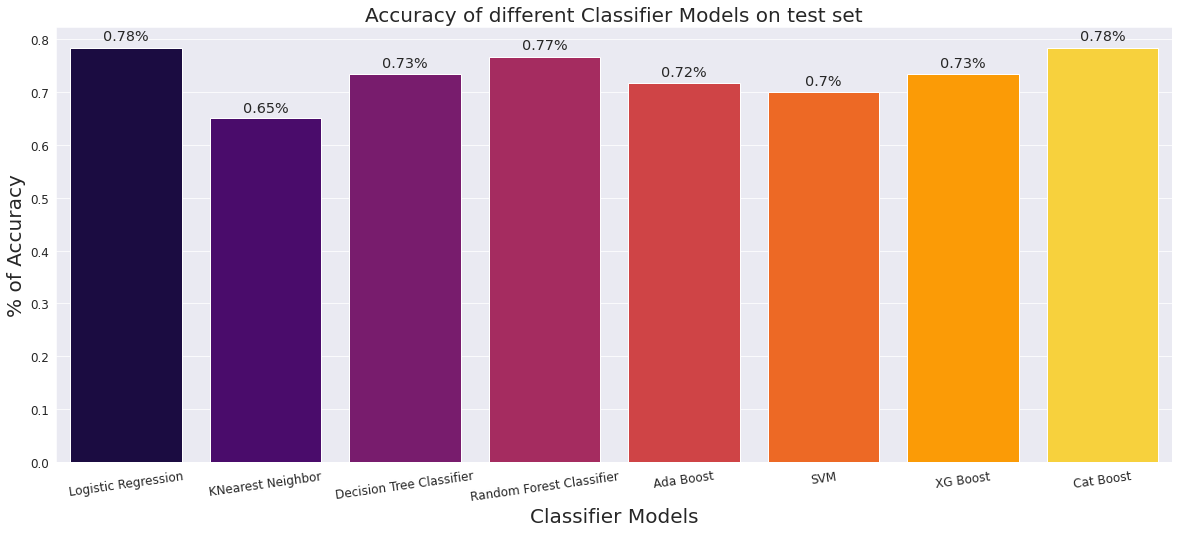

In [32]:
models_names = [
    'Logistic Regression',
'KNearest Neighbor',
'Decision Tree Classifier',
'Random Forest Classifier',
'Ada Boost',
'SVM',
'XG Boost',
'Cat Boost']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models_names, y=models_score, palette = "inferno", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
# Link of the note book: https://www.kaggle.com/rachidyz/heart-failure-data-vis-modeling/notebook
# Article : https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
